#  <u> Spotify Track Analysis Tutorial</u>

 ### By: Anuoluwapo Faboro, John Gansallo & Zikora Anyaoku

##  <u>Table of contents:</u>
1. Introduction
    - About the data
    - Libraries Used
2. Data Collection
    - Document Set Up
    - Accessing the Data
    - Tidying the Data
3. Exploratory Data Analysis
4. Hypothesis
5. Conclusion

--------

#  <u> Introduction:</u>

In this project, we introduce streaming through services such as Spotify and Apple Music. Music has never been more personalized and accessible. With the advent of streaming services, we want to see if we can identify what makes songs popular on Spotify, by looking at audio features that Spotify uses to identify tracks such as:

- Danceability
- Duration
- Tempo
- Loudness

The dataset contains about 600,000 songs gathered from the Spotify Web API, with song, artist, and release date information as well as song qualities such as acousticness, danceability, volume, tempo, and so on. The time span is from 1922 through 2020.
When grabbing each track from the dataset, we can obtain track information such as track name, album, release date, length, and popularity. More importantly, Spotify’s API allows us to extract a number of audio features such as danceability, energy, instrumentalness, liveness, loudness, speechiness, acousticness, and tempo.

We live in the Big Data era. We can collect a large amount of data, allowing us to derive useful conclusions and make well-informed strategic decisions. However, as the volume of data grows, analyzing and exploring it becomes more difficult. When utilized effectively and responsibly, visualizations can be powerful tools in exploratory data research.Visualizations can also be used to convey a message or inform our audience about our results. Because there is no one-size-fits-all approach of visualization, different tasks involve diverse types of visualizations. In this study, we'll look at the Spotify dataset, available on Kaggle.

## <u> About the Data:</u>

This data contains 600,00+ tracks that were released between 1922 till present. It also includes the track title, track id, the release date, the artist and the features each song contains.  (https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks) is where the data is obtained from. 

## <u> Libraries Used:</u>

In order to perform data analysis we will need various Python libraries that will allow us to access and parse the dataset. Some of the libraries we'll be using in this tutorial are listed along with their purpose.

   - Pandas: Used to display and organize in dataframes
   - Opendatasets: Used to collect data from Kaggle
   - Matplotlib: Used to create plots
   - Statsmodels: Used to perform hypothesis testing

In [1]:
!pip install opendatasets # If libraries are not available in your Juypter notebook you can install them like this.
import opendatasets as od
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.formula.api import ols
import re
import string
plt.style.use('seaborn')

------------------------

# <u>Data Collection</u>

## <u> Accessing the Data and Set Up</u>

Before beginning the data analysis, we need to access the dataset. We do this by provided opendatasets the link to the Kaggle dataset and providing a Kaggle API token. Once the dataset is downloaded, we use ```pandas.read_csv``` to access ```tracks.csv```.

In [2]:
# Retrieves dataset from Kaggle with an API Token
od.download('https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks') 

Skipping, found downloaded files in "./spotify-dataset-19212020-160k-tracks" (use force=True to force download)


In [3]:
tfile = 'spotify-dataset-19212020-160k-tracks/tracks.csv' # Spotify Dataset for audio features of tracks
tracks = pd.read_csv(tfile)
print(tracks.shape)
tracks.head()

(586672, 20)


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


After loading the data, we discover that there 586,672 rows (in this case, there are 586,672 tracks) and 20 columns (those tracks' attributes) within the tracks dataset. Due to the large size of the dataset, we will not be using the entirety of the dataset and thus some of the data will be left out of our analysis.

## <u> Tidying the Data</u>

Oftentimes datasets don't come in nice, prepared packages to start analysis. Before we starting examining the data, we need to clean the data, because there could be missing data, formatting issues, and other issues that could impact our analysis.

First, we want to identify if there is any missing data within our dataset.

In [4]:
tracks.isnull().sum() # Check if tracks in dataset is null or contains missing data

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

Datasets can often having missing data which can impact our analysis, so before we begin analyzing the data, we want to check if the tracks dataset has any missing data and if there is missing data we would have to consider the circumstances that it is missing under, in other to decide the steps we taking moving forward. 

From the output above we notice 72 names are missing, but the other column within the dataframe do not contain any other missing values. We can assume that the data is missing completely at random (MCAR) for several reasons which are provided below: 

   1. Only the name column has missing data has missing data
   2. The id column is the special identifier for the track so even if the name is missing, one can still identify the name of the track by accessing Spotify's API and using the trackID
   3. There’s no relationship between whether a data point is missing and any values in the data set, missing or observed.
   
Next, we want to make sure that our data is properly formatted.

In [5]:
tracks['release_date'].head(10)

0    1922-02-22
1    1922-06-01
2    1922-03-21
3    1922-03-21
4          1922
5          1922
6          1922
7          1922
8          1922
9    1922-03-29
Name: release_date, dtype: object

Based on initial dataset, there are some columns within the Tracks dataset that need to be cleaned, for example, the release data isn't consistent as some rows include the day and month of the track release and others just include the year of release. Thus to streamline the data, we will be only considering the year of release. 

In [6]:
# Limits the release date to the year of the track
tracks['release_date'] = tracks['release_date'].str[:4].astype(int)
tracks.sort_values(by='release_date', inplace = True)
tracks.rename(columns = {'release_date' : 'year'}, inplace = True)
tracks.reset_index(drop=True, inplace=True)
tracks.head(5)

,id,name,popularity,duration_ms,explicit,artists,id_artists,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,74CSJTE5QQp1e4bHzm3wti,Maldita sea la primera vez,19,233920,0,['Los Pincheira del Sur'],['1BnQrx8p0bHBpidjIGq26z'],1900,0.659,0.791,2,-4.895,1,0.0295,0.139,0.000002,0.1610,0.956,141.999,4
1,3AwlEhAkDDwKuTaNlgmMNQ,Nola,0,233426,0,"['Vincent Lopez and his Orchestra', 'Vincent L...","['1NElogFmaZxxGVsKS6hvl2', '3wxzXhMAoYbpJDXtBx...",1922,0.567,0.663,2,-5.334,1,0.0318,0.992,0.878000,0.2680,0.853,103.394,4
2,32Y9PU9JqxYFqzFaIdCQOs,Midnight rose,0,195862,0,"['Abe Lyman’s Orchestra', 'Abe Lyman']","['6LxnbCQ3ZrKj1lvC1lylS5', '3cNzWID6yZ1HN8qj4g...",1922,0.483,0.060,1,-9.499,1,0.0420,0.982,0.000089,0.0498,0.381,136.044,4
3,2zRV6Vk6ZQYDokmiv5QEoP,California blues,0,195470,0,"['Abe Lyman’s Orchestra', 'Abe Lyman']","['6LxnbCQ3ZrKj1lvC1lylS5', '3cNzWID6yZ1HN8qj4g...",1922,0.578,0.462,8,-7.217,1,0.0398,0.995,0.903000,0.0767,0.513,89.876,4
4,2uqaxtC6Usy7QeKfoD1jhB,Good evenin',0,189649,0,"['Isham Jones & His Orchestra', 'Isham Jones']","['65A1WinXDUhVkZD98s8kKU', '4OWTlYl5kkhaZEsyjU...",1922,0.565,0.334,10,-6.802,1,0.0309,0.978,0.032900,0.2560,0.550,97.167,4


In [7]:
tracks.tail(5)

,id,name,popularity,duration_ms,explicit,artists,id_artists,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
586667,4XZ0ow6wtWOxDy0WMMzcBG,Somos Iguales,1,236587,0,"['Jhay Cortez', 'Zion & Lennox']","['0EFisYRi20PTADoJrifHrz', '21451j1KhjAiaYKflx...",2021,0.777,0.714,11,-4.296,1,0.0532,0.1600,0.000000,0.1150,0.590,90.987,4
586668,4RU0r5hnonG58XU4NqCBto,No Me Conoce - Remix,0,309120,0,"['Jhay Cortez', 'J Balvin', 'Bad Bunny']","['0EFisYRi20PTADoJrifHrz', '1vyhD5VmyZ7KMfW5gq...",2021,0.804,0.786,10,-3.837,0,0.0735,0.1440,0.000000,0.0928,0.575,91.992,4
586669,4HdpcPFATP6heiXec1GWH0,CÓMO SE SIENTE - Remix,0,227520,1,"['Jhay Cortez', 'Bad Bunny']","['0EFisYRi20PTADoJrifHrz', '4q3ewBCX7sLwd24euu...",2021,0.807,0.606,3,-8.871,0,0.0872,0.0946,0.000000,0.1190,0.304,92.988,4
586670,6cI7wJTCwrvcfIuapt9JCC,Imaginaste - Remix,1,246653,0,"['Jhay Cortez', 'Wisin & Yandel']","['0EFisYRi20PTADoJrifHrz', '1wZtkThiXbVNtj6hee...",2021,0.855,0.710,1,-5.321,1,0.0939,0.0426,0.000000,0.3370,0.591,89.977,4
586671,3kNWyHdLVW1x6pn9EnSQ1H,Didn't Know,71,168897,0,['Tom Zanetti'],['73Msd8rknjBghcGQiZ1mgh'],2021,0.896,0.459,1,-8.937,1,0.0515,0.0737,0.000084,0.0981,0.484,125.939,4


Because there is only one track that was released in 1900, we will drop that row because it's an outlier that can affect our analysis.

In [8]:
tracks = tracks.drop([tracks.index[0]])
tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
1,3AwlEhAkDDwKuTaNlgmMNQ,Nola,0,233426,0,"['Vincent Lopez and his Orchestra', 'Vincent L...","['1NElogFmaZxxGVsKS6hvl2', '3wxzXhMAoYbpJDXtBx...",1922,0.567,0.663,2,-5.334,1,0.0318,0.992,0.878000,0.2680,0.853,103.394,4
2,32Y9PU9JqxYFqzFaIdCQOs,Midnight rose,0,195862,0,"['Abe Lyman’s Orchestra', 'Abe Lyman']","['6LxnbCQ3ZrKj1lvC1lylS5', '3cNzWID6yZ1HN8qj4g...",1922,0.483,0.060,1,-9.499,1,0.0420,0.982,0.000089,0.0498,0.381,136.044,4
3,2zRV6Vk6ZQYDokmiv5QEoP,California blues,0,195470,0,"['Abe Lyman’s Orchestra', 'Abe Lyman']","['6LxnbCQ3ZrKj1lvC1lylS5', '3cNzWID6yZ1HN8qj4g...",1922,0.578,0.462,8,-7.217,1,0.0398,0.995,0.903000,0.0767,0.513,89.876,4
4,2uqaxtC6Usy7QeKfoD1jhB,Good evenin',0,189649,0,"['Isham Jones & His Orchestra', 'Isham Jones']","['65A1WinXDUhVkZD98s8kKU', '4OWTlYl5kkhaZEsyjU...",1922,0.565,0.334,10,-6.802,1,0.0309,0.978,0.032900,0.2560,0.550,97.167,4
5,2tKVyDsEVSrAibTVhFGDGH,I can't believe It's true,0,197407,0,"['Isham Jones & His Orchestra', 'Isham Jones']","['65A1WinXDUhVkZD98s8kKU', '4OWTlYl5kkhaZEsyjU...",1922,0.780,0.600,5,-4.948,0,0.1940,0.988,0.012100,0.1150,0.843,123.595,4


To make the duration of a track more readable, we will convert the column ```duration_ms``` from milliseconds to minutes.

In [9]:
tracks['duration_ms'] = tracks['duration_ms'].apply(lambda x: x/60000)
tracks.rename(columns = {'duration_ms' : 'duration_min'}, inplace = True)
tracks.head()

,id,name,popularity,duration_min,explicit,artists,id_artists,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
1,3AwlEhAkDDwKuTaNlgmMNQ,Nola,0,3.890433,0,"['Vincent Lopez and his Orchestra', 'Vincent L...","['1NElogFmaZxxGVsKS6hvl2', '3wxzXhMAoYbpJDXtBx...",1922,0.567,0.663,2,-5.334,1,0.0318,0.992,0.878000,0.2680,0.853,103.394,4
2,32Y9PU9JqxYFqzFaIdCQOs,Midnight rose,0,3.264367,0,"['Abe Lyman’s Orchestra', 'Abe Lyman']","['6LxnbCQ3ZrKj1lvC1lylS5', '3cNzWID6yZ1HN8qj4g...",1922,0.483,0.060,1,-9.499,1,0.0420,0.982,0.000089,0.0498,0.381,136.044,4
3,2zRV6Vk6ZQYDokmiv5QEoP,California blues,0,3.257833,0,"['Abe Lyman’s Orchestra', 'Abe Lyman']","['6LxnbCQ3ZrKj1lvC1lylS5', '3cNzWID6yZ1HN8qj4g...",1922,0.578,0.462,8,-7.217,1,0.0398,0.995,0.903000,0.0767,0.513,89.876,4
4,2uqaxtC6Usy7QeKfoD1jhB,Good evenin',0,3.160817,0,"['Isham Jones & His Orchestra', 'Isham Jones']","['65A1WinXDUhVkZD98s8kKU', '4OWTlYl5kkhaZEsyjU...",1922,0.565,0.334,10,-6.802,1,0.0309,0.978,0.032900,0.2560,0.550,97.167,4
5,2tKVyDsEVSrAibTVhFGDGH,I can't believe It's true,0,3.290117,0,"['Isham Jones & His Orchestra', 'Isham Jones']","['65A1WinXDUhVkZD98s8kKU', '4OWTlYl5kkhaZEsyjU...",1922,0.780,0.600,5,-4.948,0,0.1940,0.988,0.012100,0.1150,0.843,123.595,4


To make it easier for us to parse through the artist data, we will convert the ```artists``` column to a list rather than a Pandas Series.

In [10]:
# Converts the string to an array
def convertStrArray(str):
    arr = re.split(",|'|]|\[", str)
    fixed = []
    for val in arr:
        if (val != '') and (val != ' '):
            fixed.append(val)
    return fixed

In [11]:
tracks['artists'] = tracks['artists'].apply(lambda x: convertStrArray(x))
tracks['artists'].head()

1    [Vincent Lopez and his Orchestra, Vincent Lopez]
2                  [Abe Lyman’s Orchestra, Abe Lyman]
3                  [Abe Lyman’s Orchestra, Abe Lyman]
4          [Isham Jones & His Orchestra, Isham Jones]
5          [Isham Jones & His Orchestra, Isham Jones]
Name: artists, dtype: object

-----------------------------------------------------------

# <u>Exploratory Data Analysis</u>

Examining the relationship between the popularity of songs vs the identified aspects. The Exploratory Data Analysis step is a chance to examine the dataset to identify patterns within the dataset. Occasionally, while examining the dataset you may find that different features may not be related at all.

### <u>Attribute Categories</u>

- Danceability: an attribute that refers to how ideal a track is for dancing based on a number of factors such as tempo, rhythm stability, beat strength, and general regularity . A value of 0.0 is least danceable and 1 is most danceable.
- Energy:  a scale ranging from 0.0 to 1 that represents a subjective measure of activity and intensity. Typical energetic tunes have a quick, loud, and animated feel to them.
- Instrumentalness: predicts whether a track has vocals or not. The closer the instrumentalness value is to 1, the higher the track contains no vocal content. 
- Liveness: discovers the existence of an audience in the recording.  A value above 0.8 provides strong likelihood that the track is live.
- Loudness: the loudness of a track in decibels. Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. 
- Speechiness: speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording, the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words.
- Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive, while tracks with low valence sound more negative.
- Tempo: the overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- Duration: the duration of the track in milliseconds.


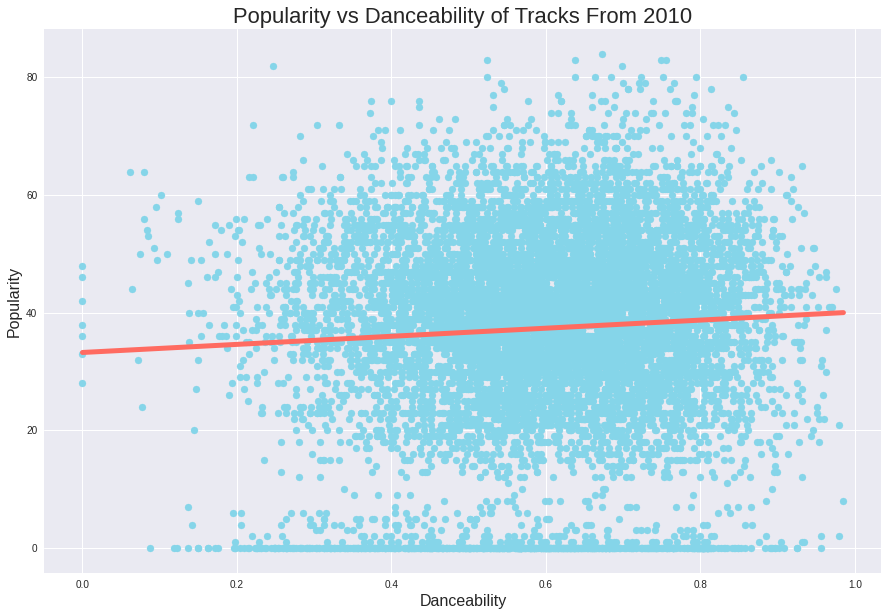

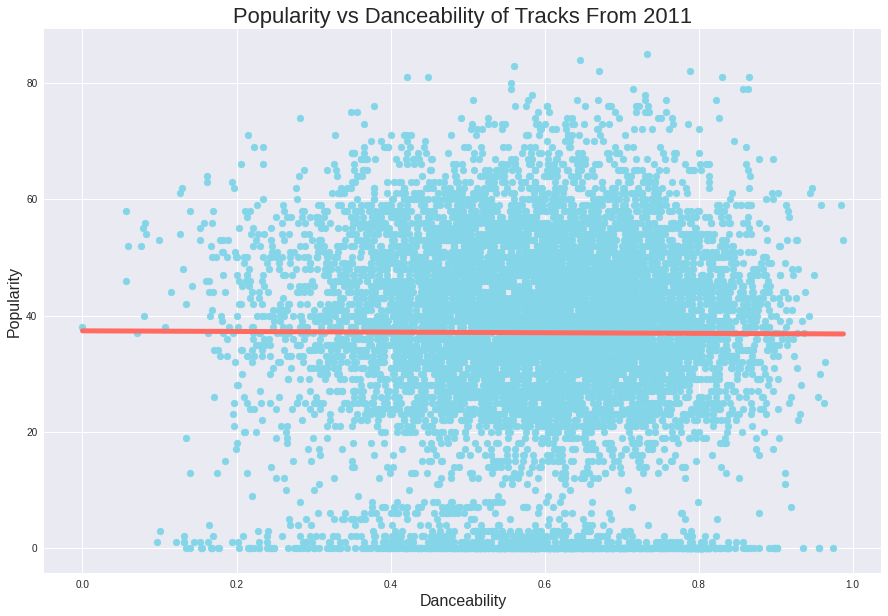

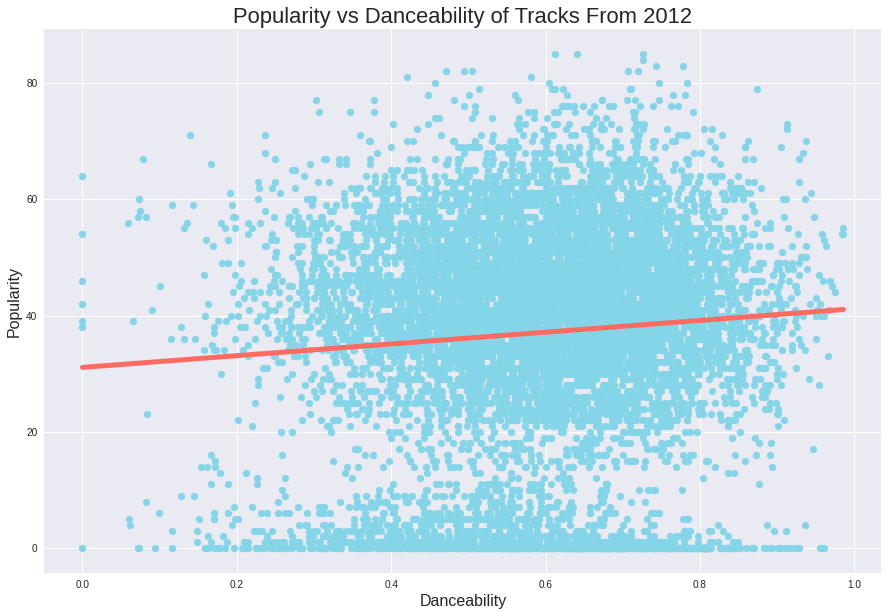

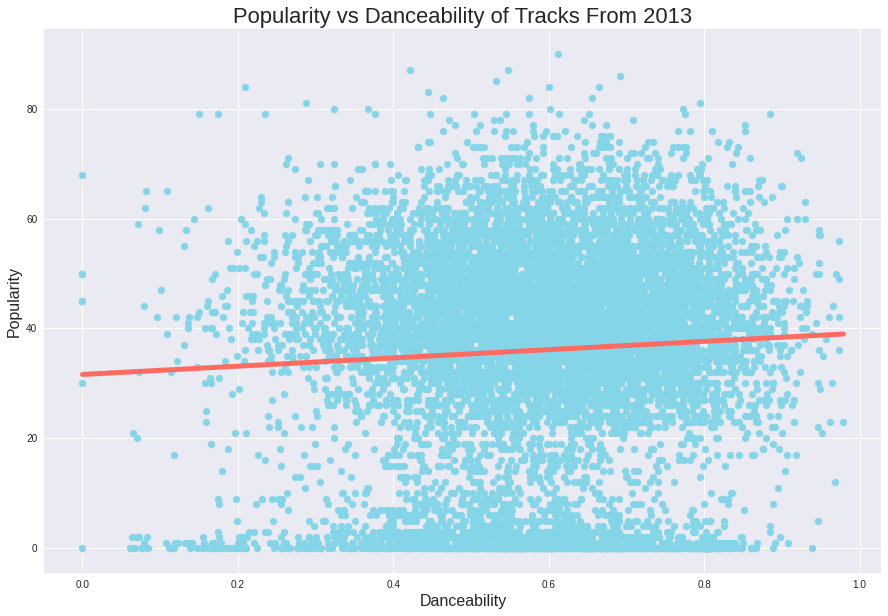

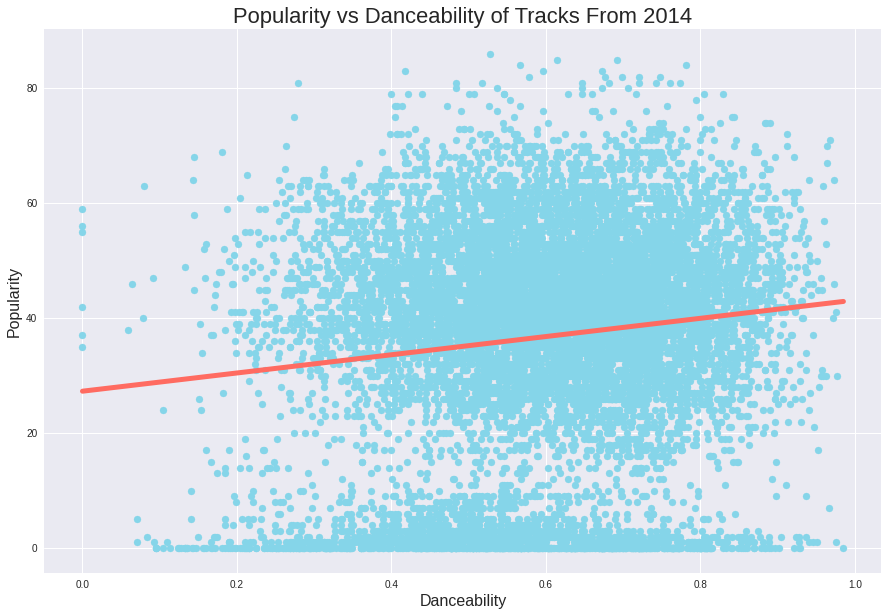

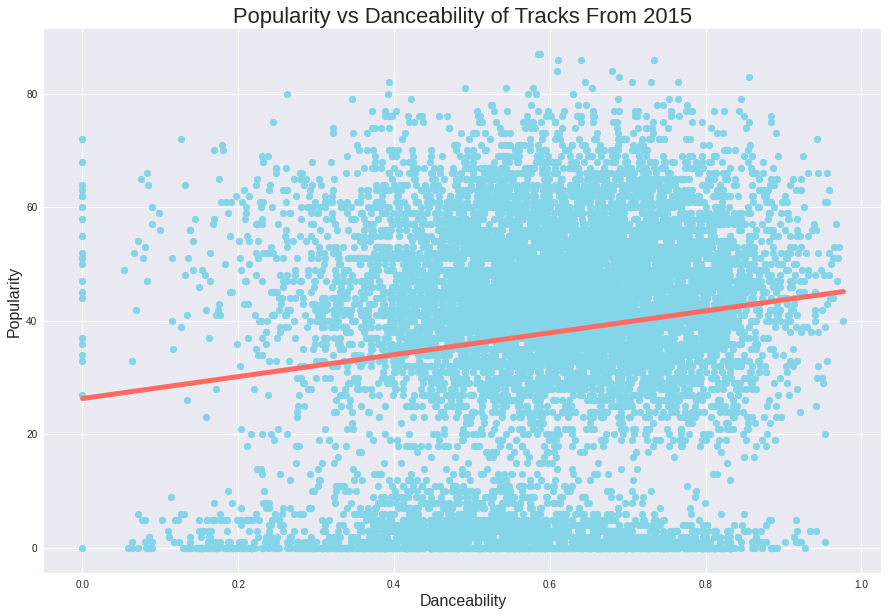

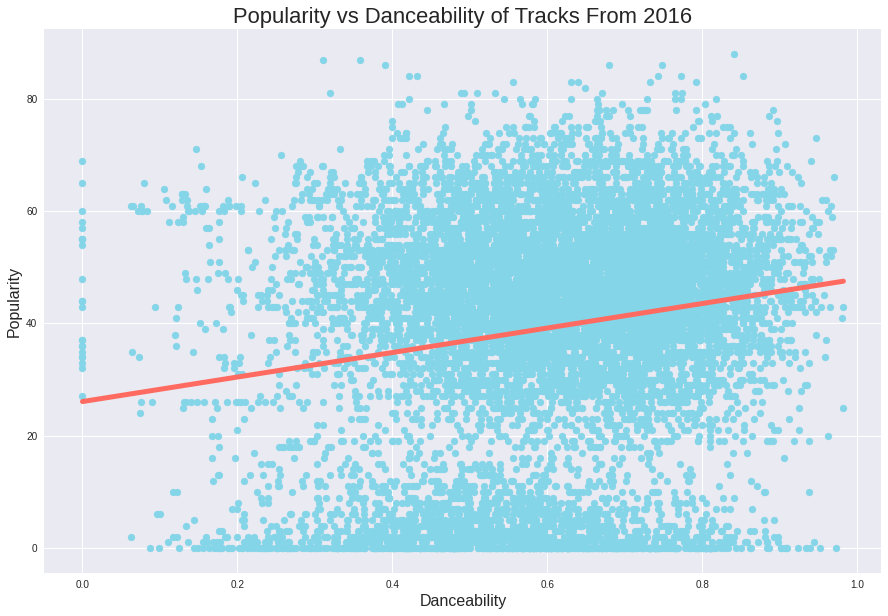

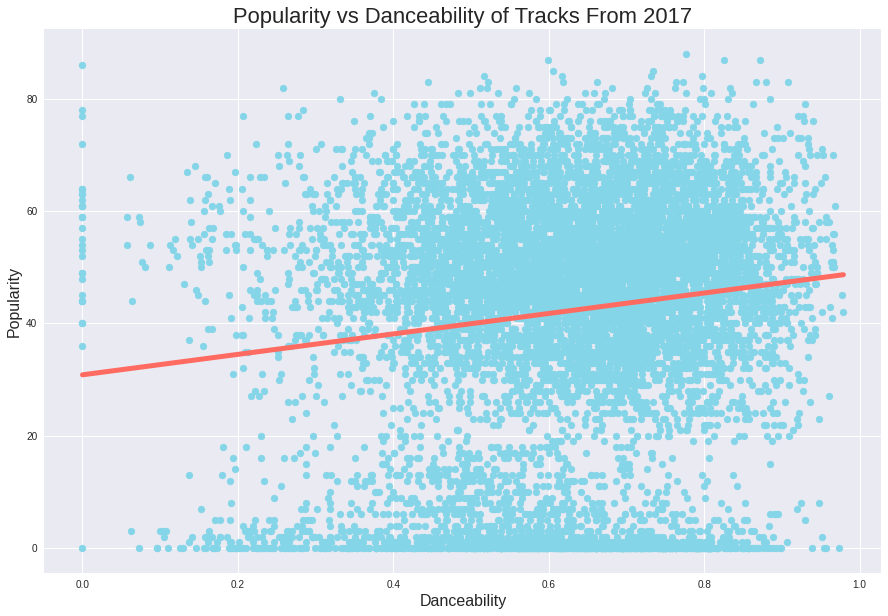

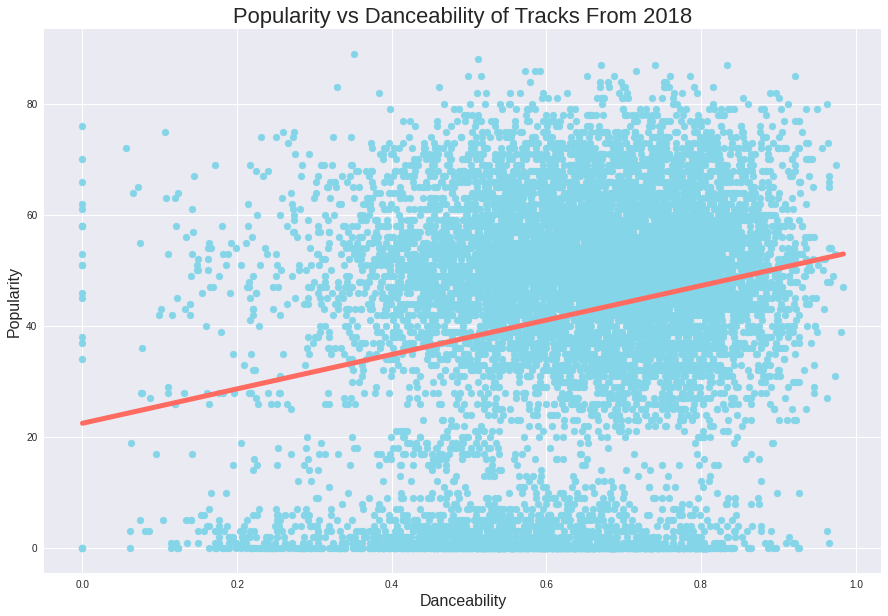

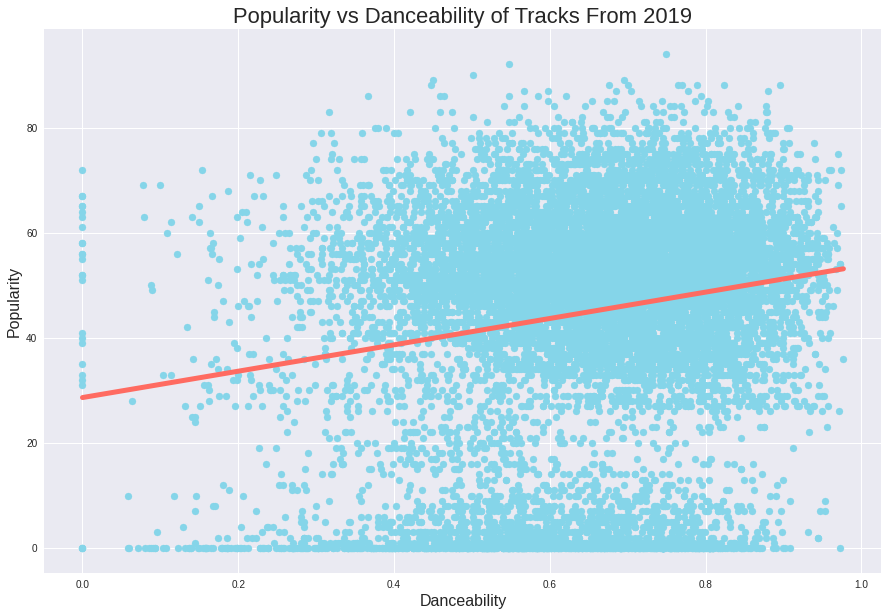

In [12]:
years = range(2010, 2020)
for i in years:
    # Creates a scatterplot plotting the relationship between danceability 
    # and popularity of each track released between 2010 and 2019 for each year
    by_year = tracks[tracks['year'] == i]
    fig = plt.figure(figsize=(15, 10))
    plt.scatter(x = by_year['danceability'], y = by_year['popularity'], color = '#85D5E9')
    plt.ylabel('Popularity', size = 16)
    plt.xlabel('Danceability', size = 16)
    plt.title('Popularity vs Danceability of Tracks From ' + str(i), size = 22)
    
    # Adds a linear regression to the scatterplot
    d = np.polyfit(by_year['danceability'], by_year['popularity'], 1)
    f = np.poly1d(d)
    x_linreg = np.linspace(by_year['danceability'].min(),
                           by_year['danceability'].max(),
                           200)
    y_linreg = f(x_linreg)
    plt.plot(x_linreg, y_linreg, color="#ff6b61", linewidth=5.0)
    
    by_year = pd.DataFrame()

We've looked at the relationship between Popularity and Danceability amongst tracks over the past 10 years from 2010 to 2019 however there is no relationship between Popularity vs. Danceability. From this set of graphs we can surmise that danceability has no affect on the popularity of a track on Spotify. Next we'll see if there's a relationship between popularity and the tempo of a track.

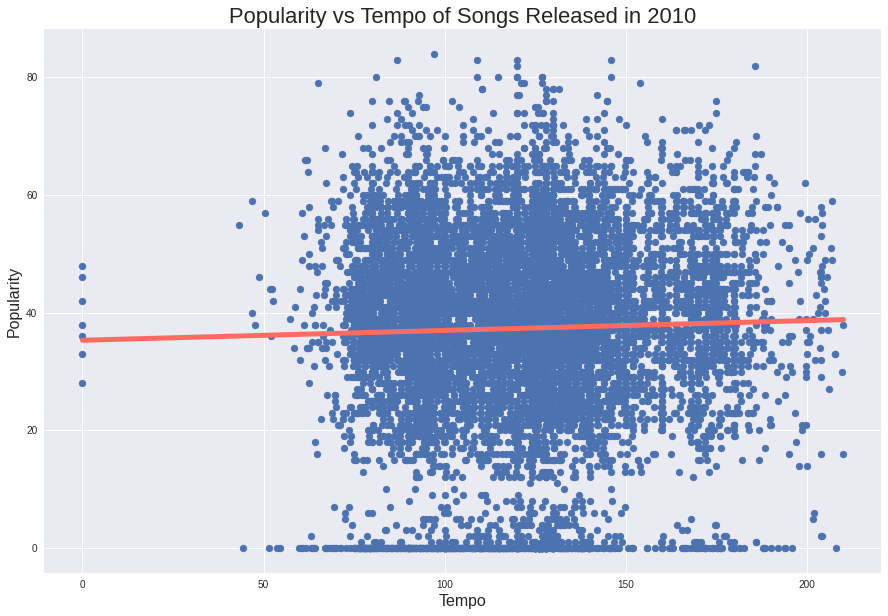

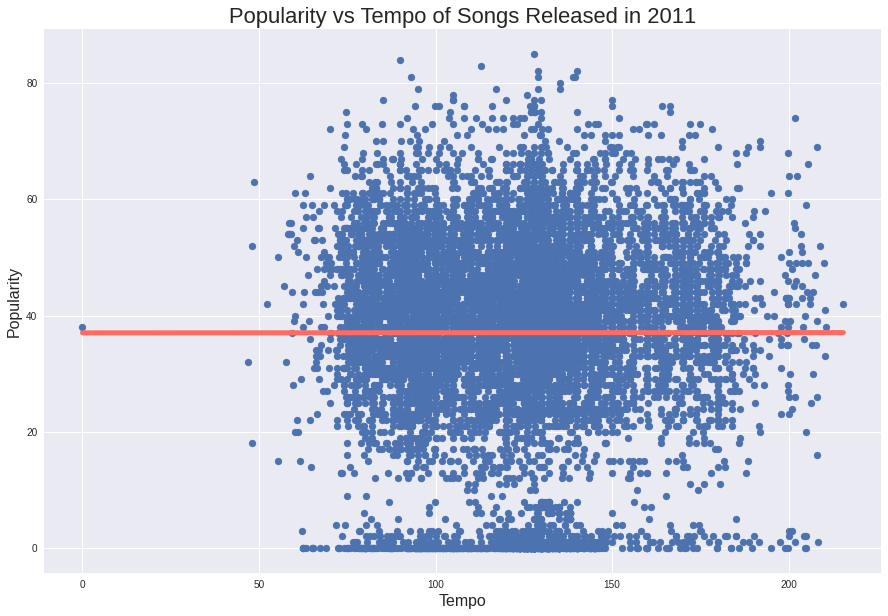

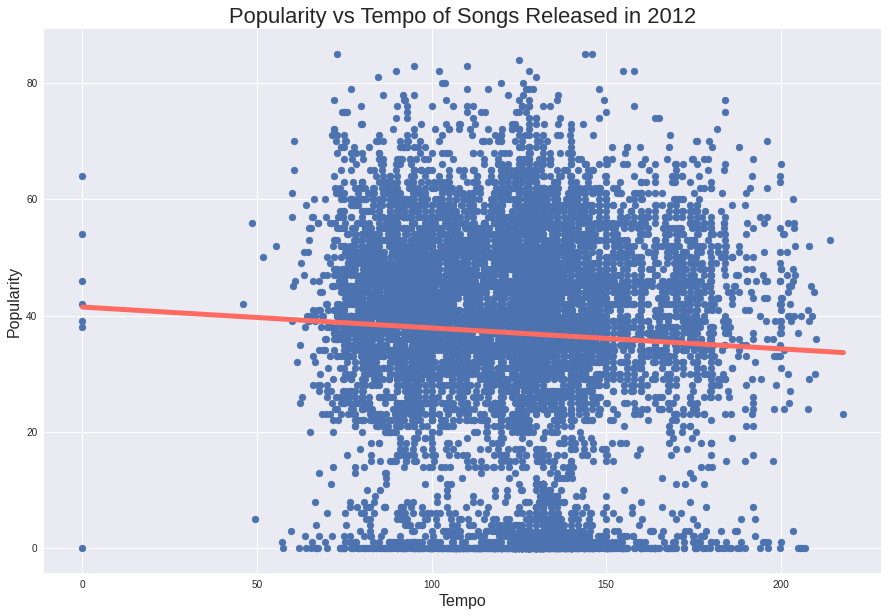

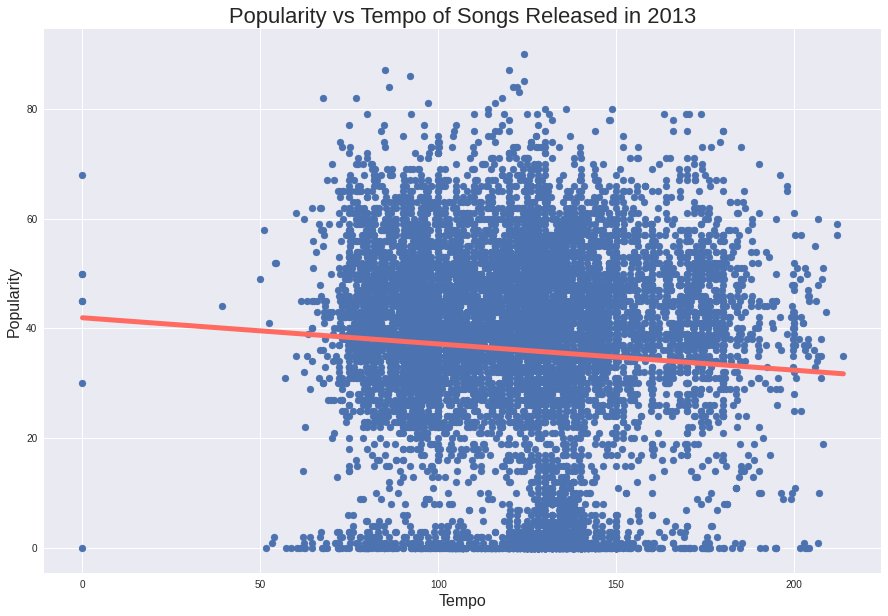

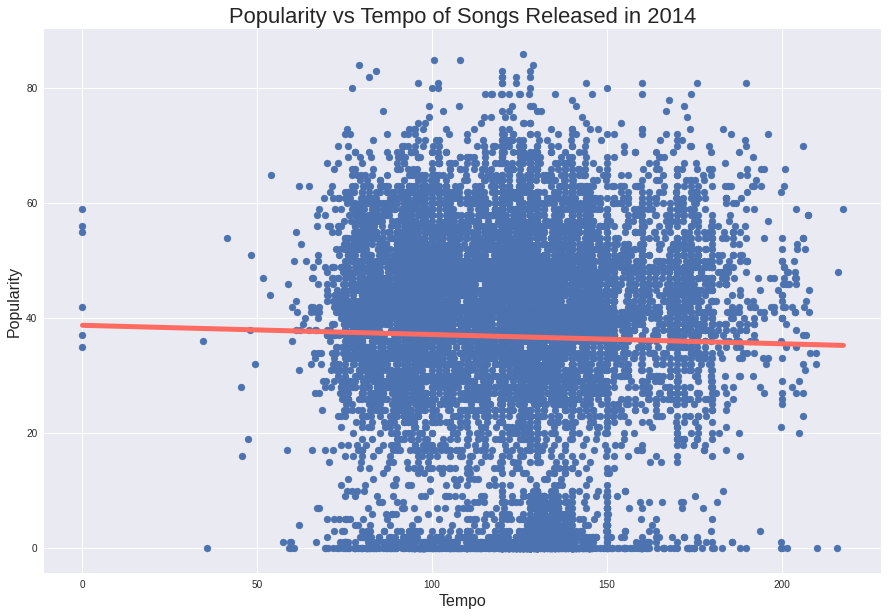

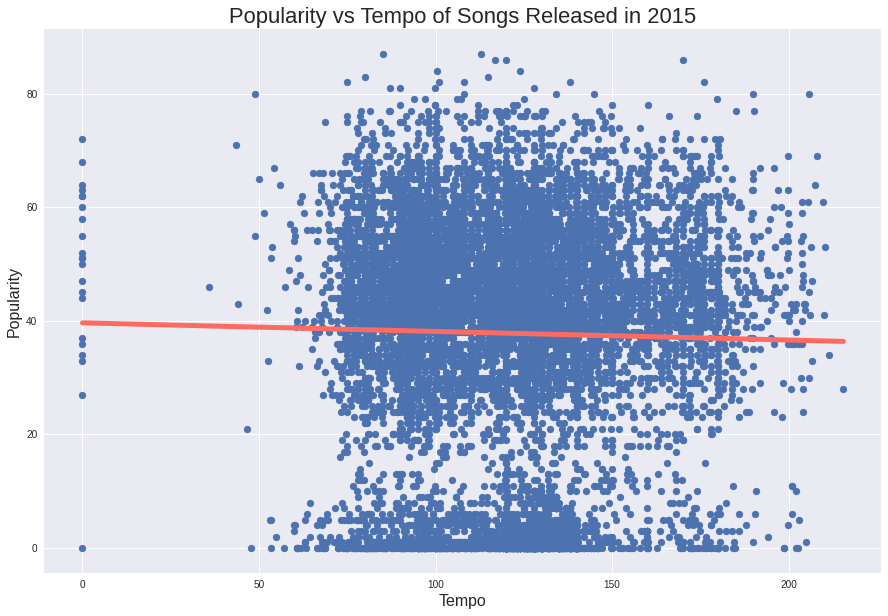

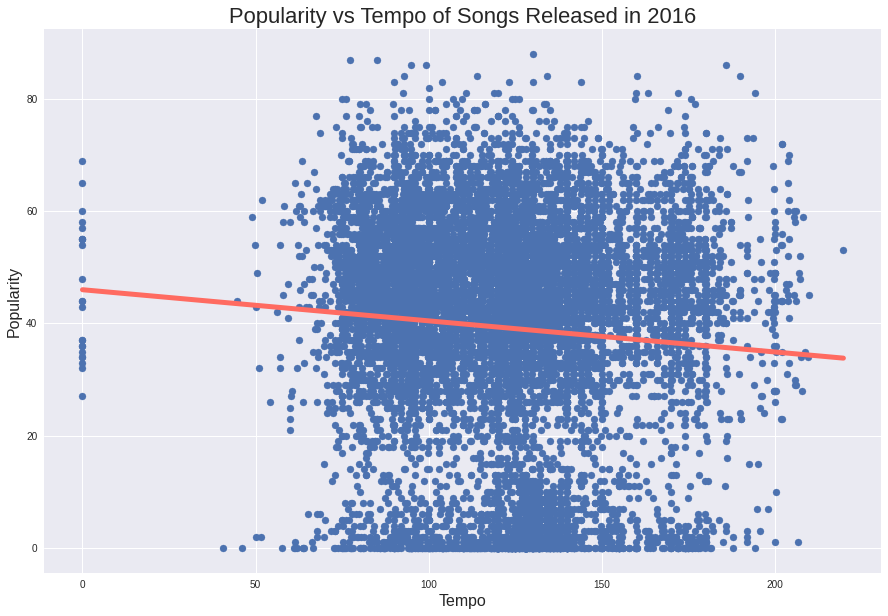

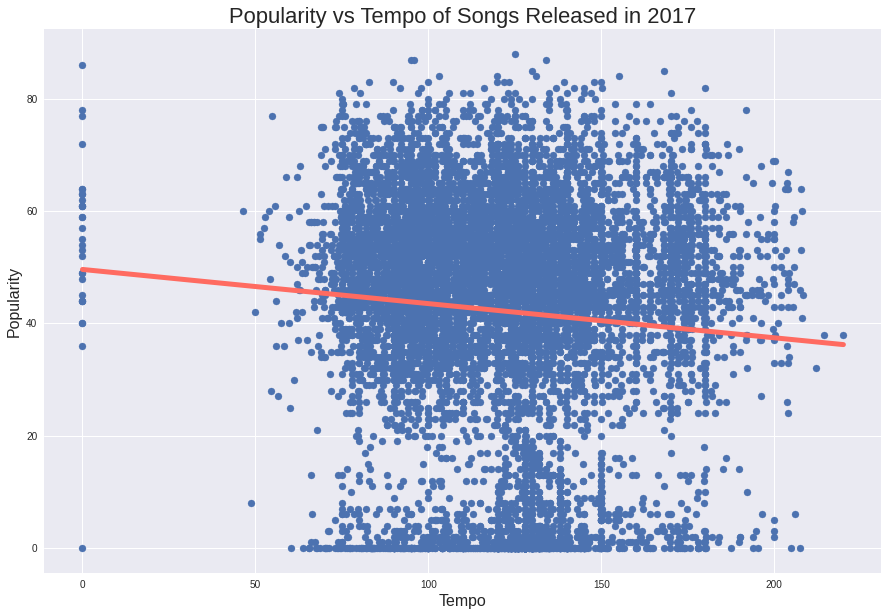

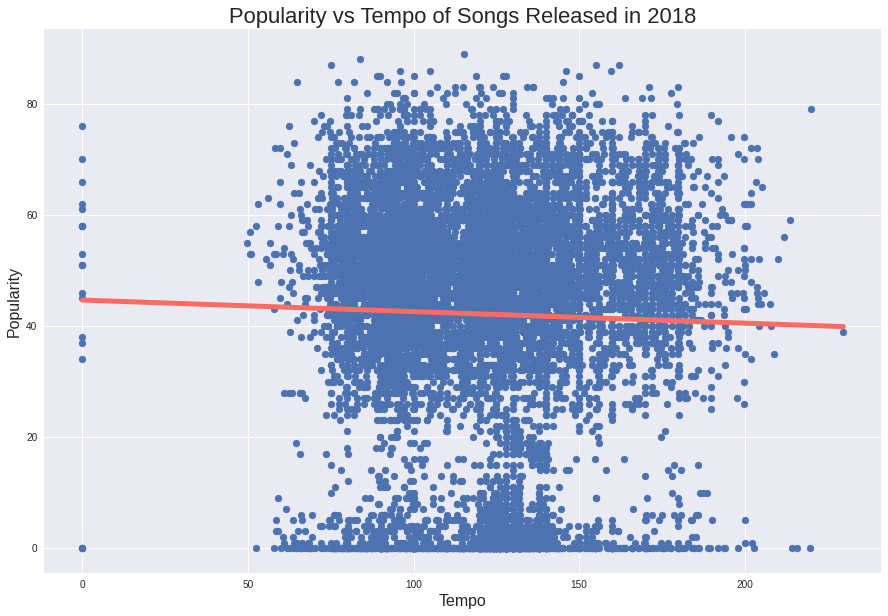

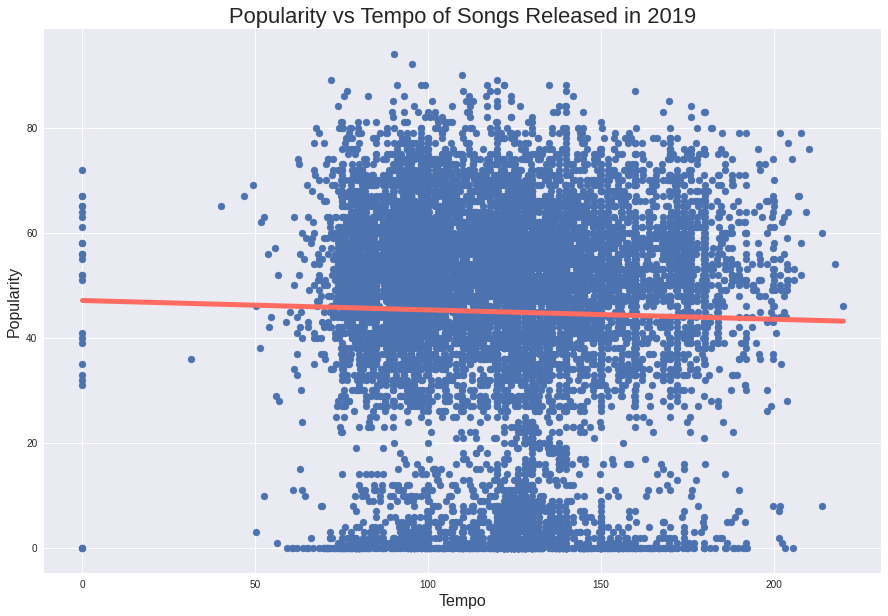

In [13]:
years = range(2010, 2020)
for i in years:
    by_year = tracks[tracks['year'] == i]
    fig = plt.figure(figsize=(15, 10))
    plt.scatter(x = by_year['tempo'], y = by_year['popularity'])
    plt.ylabel('Popularity', size = 16)
    plt.xlabel('Tempo', size = 16)
    plt.title('Popularity vs Tempo of Songs Released in ' + str(i), size = 22)
    
    # Adds a linear regression to the scatterplot
    d = np.polyfit(by_year['tempo'], by_year['popularity'], 1)
    f = np.poly1d(d)
    x_linreg = np.linspace(by_year['tempo'].min(),
                           by_year['tempo'].max(),
                           200)
    y_linreg = f(x_linreg)
    plt.plot(x_linreg, y_linreg, color="#ff6b61", linewidth=5.0)
    
    by_year = pd.DataFrame()    

After plotting the tempo and popularity of tracks released between 2010 and 2019, there also appears to be no relationship thus tempo can't be a factor in what makes a song popular on Spotify. Next we'll see if duration of a track will have an impact on a song's popularity. However based on the trend we're seeing so far, there may not be a relationship between the duration of a song and the population of a song.

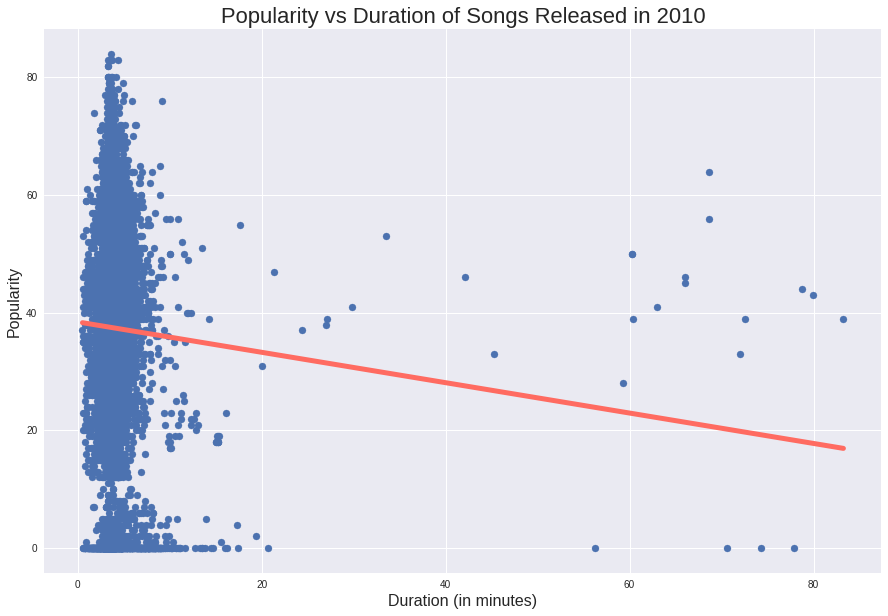

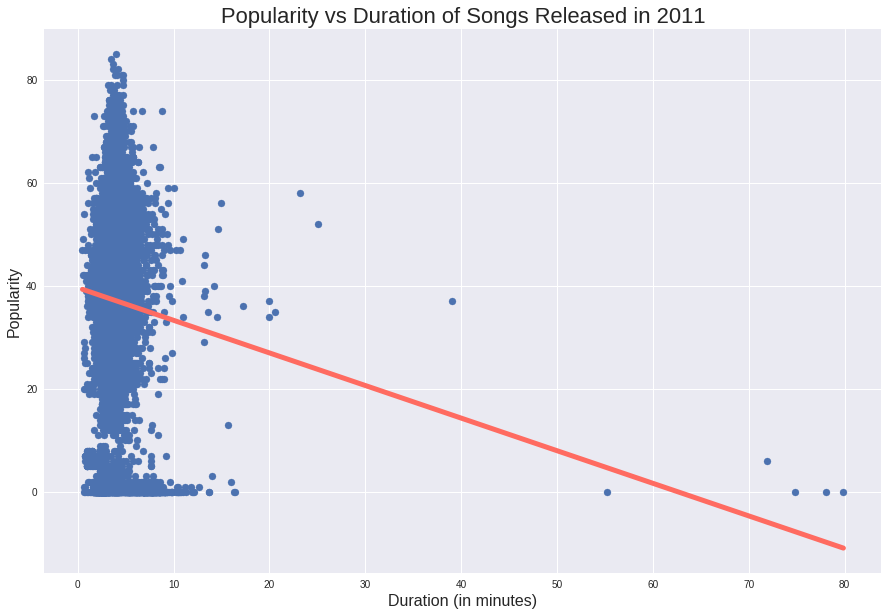

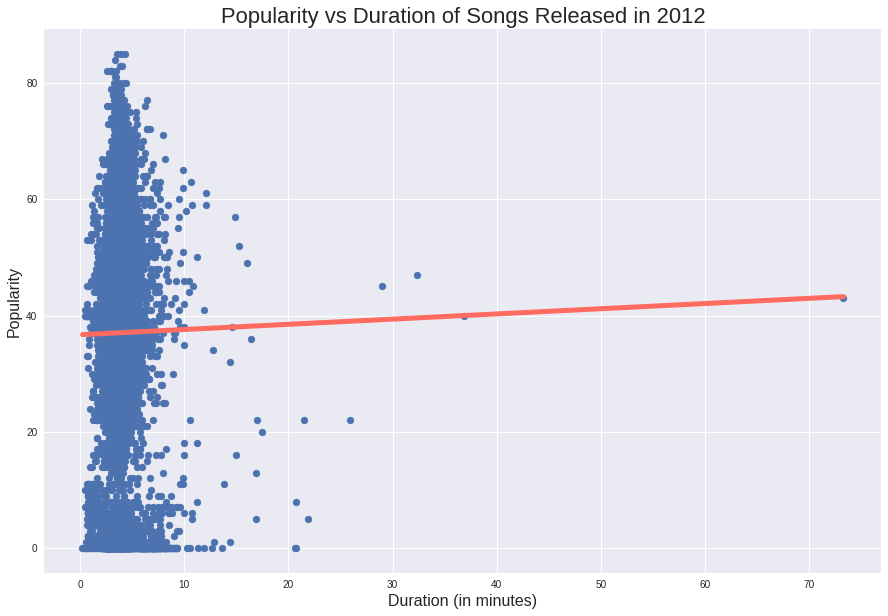

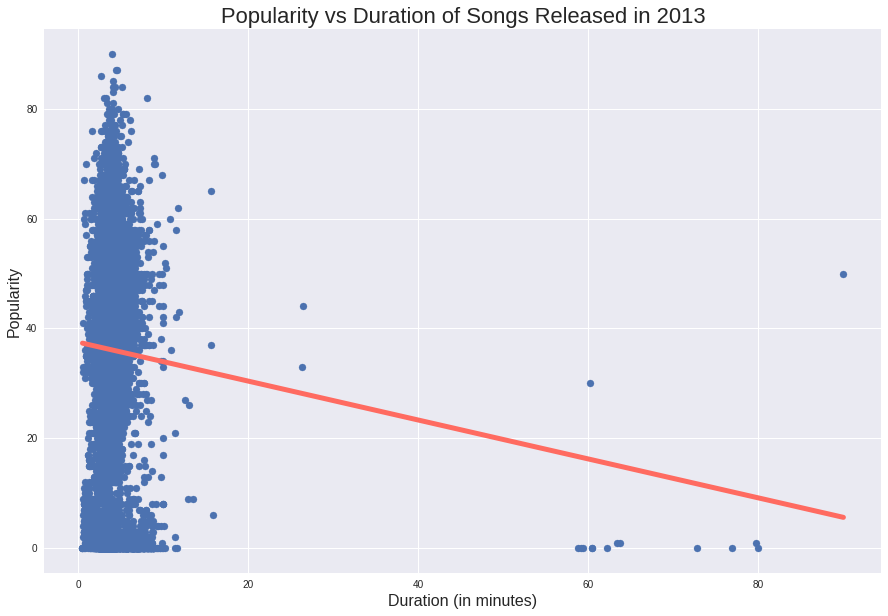

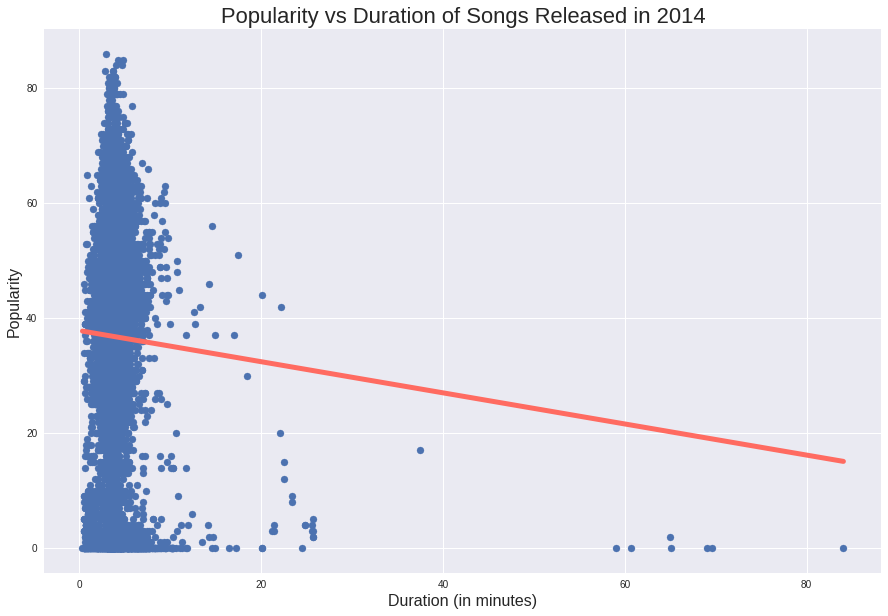

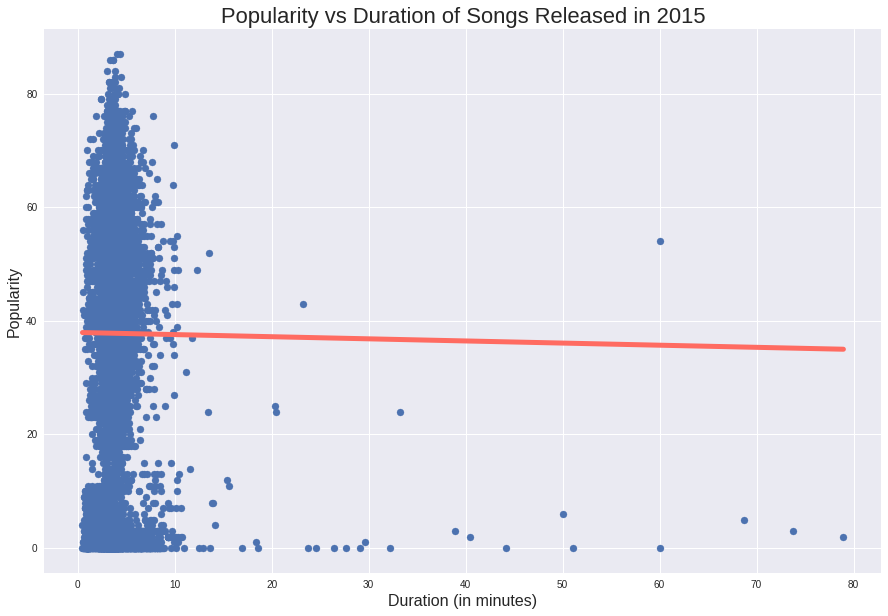

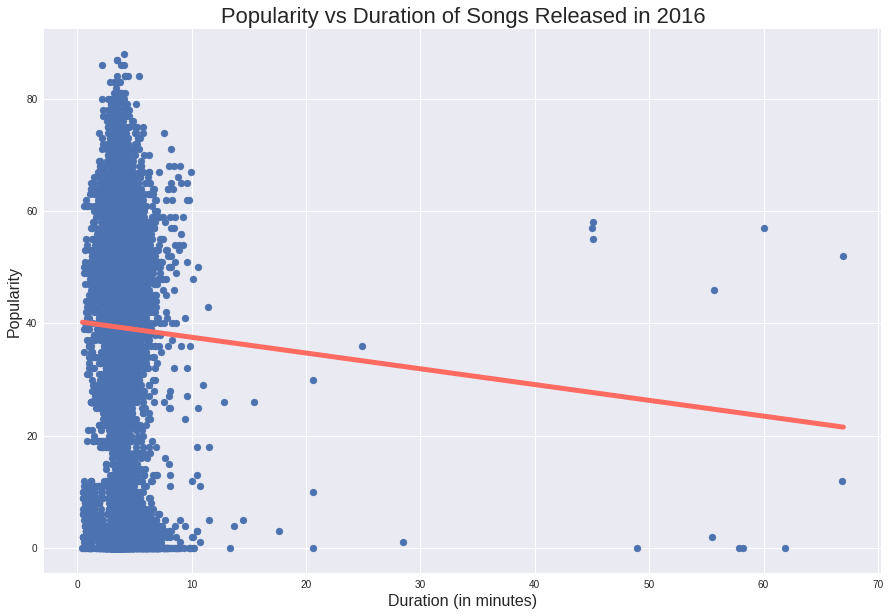

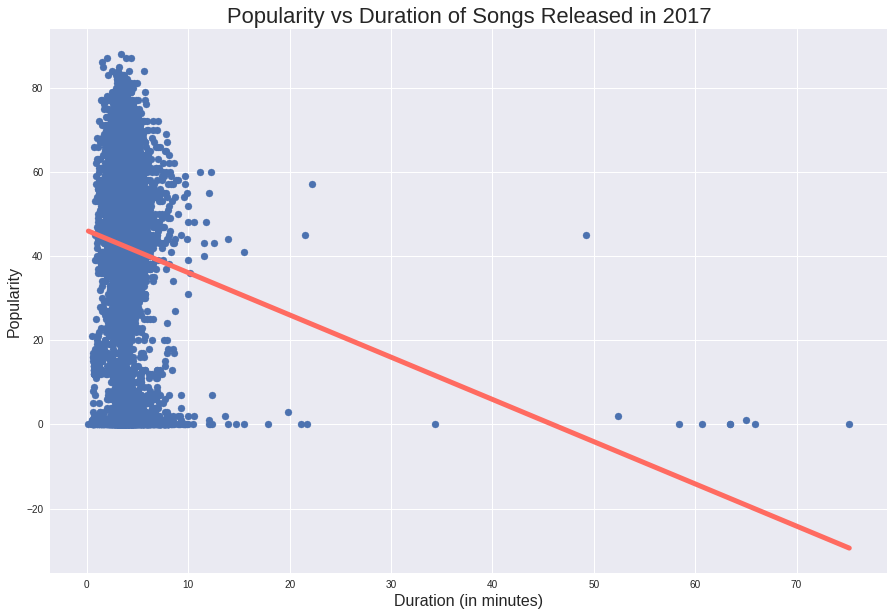

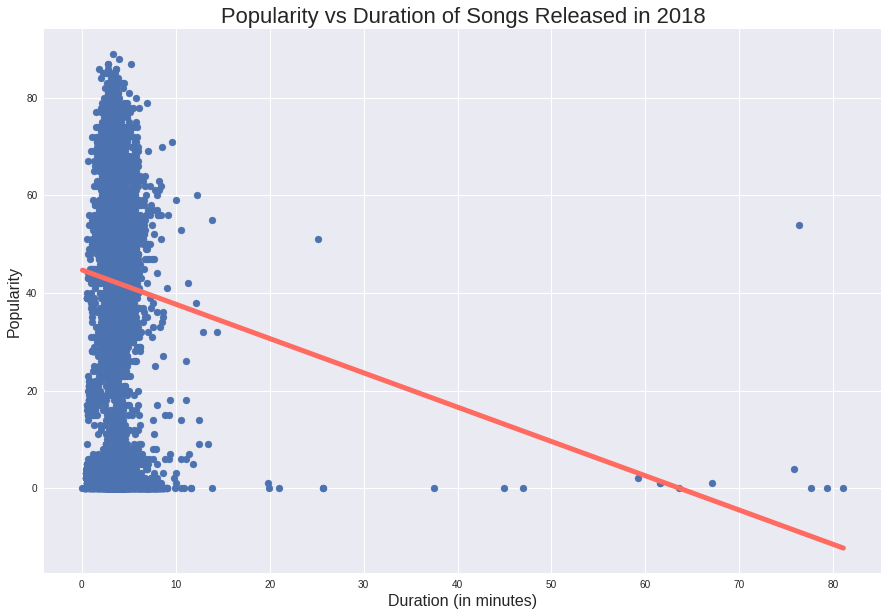

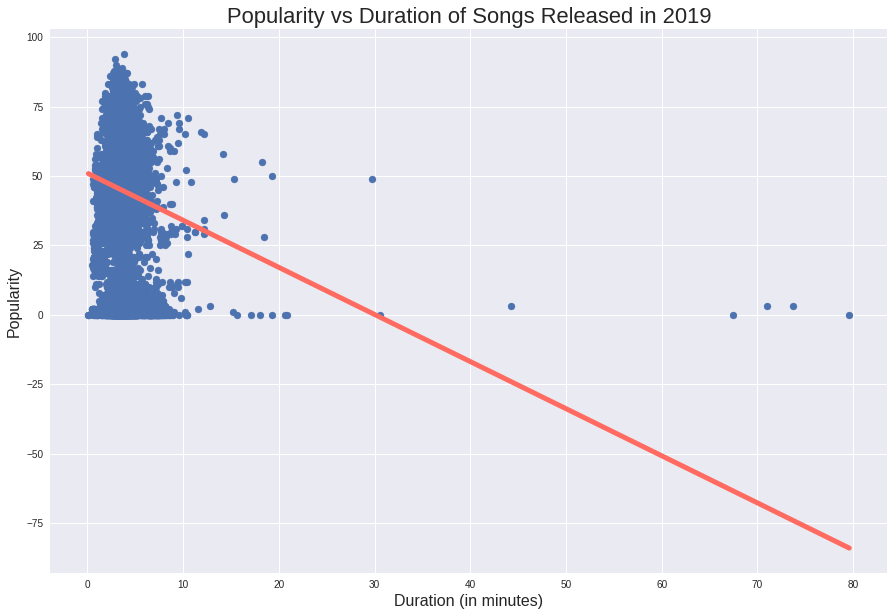

In [14]:
years = range(2010, 2020)
for i in years:
    fig = plt.figure(figsize = (15, 10))
    by_year = tracks[tracks['year'] == i]
    plt.scatter(x = by_year['duration_min'], y = by_year['popularity'])
    plt.ylabel('Popularity', size = 16)
    plt.xlabel('Duration (in minutes)', size = 16)
    plt.title('Popularity vs Duration of Songs Released in ' + str(i), size = 22)
    
    # Adds a linear regression to the scatterplot
    d = np.polyfit(by_year['duration_min'], by_year['popularity'], 1)
    f = np.poly1d(d)
    x_linreg = np.linspace(by_year['duration_min'].min(),
                           by_year['duration_min'].max(),
                           200)
    y_linreg = f(x_linreg)
    plt.plot(x_linreg, y_linreg, color="#ff6b61", linewidth=5.0)
    
    by_year = pd.DataFrame()

In [15]:
limit = tracks[tracks.year < 2020]
limit.head()

,id,name,popularity,duration_min,explicit,artists,id_artists,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
1,3AwlEhAkDDwKuTaNlgmMNQ,Nola,0,3.890433,0,"[Vincent Lopez and his Orchestra, Vincent Lopez]","['1NElogFmaZxxGVsKS6hvl2', '3wxzXhMAoYbpJDXtBx...",1922,0.567,0.663,2,-5.334,1,0.0318,0.992,0.878000,0.2680,0.853,103.394,4
2,32Y9PU9JqxYFqzFaIdCQOs,Midnight rose,0,3.264367,0,"[Abe Lyman’s Orchestra, Abe Lyman]","['6LxnbCQ3ZrKj1lvC1lylS5', '3cNzWID6yZ1HN8qj4g...",1922,0.483,0.060,1,-9.499,1,0.0420,0.982,0.000089,0.0498,0.381,136.044,4
3,2zRV6Vk6ZQYDokmiv5QEoP,California blues,0,3.257833,0,"[Abe Lyman’s Orchestra, Abe Lyman]","['6LxnbCQ3ZrKj1lvC1lylS5', '3cNzWID6yZ1HN8qj4g...",1922,0.578,0.462,8,-7.217,1,0.0398,0.995,0.903000,0.0767,0.513,89.876,4
4,2uqaxtC6Usy7QeKfoD1jhB,Good evenin',0,3.160817,0,"[Isham Jones & His Orchestra, Isham Jones]","['65A1WinXDUhVkZD98s8kKU', '4OWTlYl5kkhaZEsyjU...",1922,0.565,0.334,10,-6.802,1,0.0309,0.978,0.032900,0.2560,0.550,97.167,4
5,2tKVyDsEVSrAibTVhFGDGH,I can't believe It's true,0,3.290117,0,"[Isham Jones & His Orchestra, Isham Jones]","['65A1WinXDUhVkZD98s8kKU', '4OWTlYl5kkhaZEsyjU...",1922,0.780,0.600,5,-4.948,0,0.1940,0.988,0.012100,0.1150,0.843,123.595,4


In [16]:
mean_danceability = limit.groupby(['year'])['danceability'].mean()
mean_danceability = mean_danceability.to_frame()
mean_danceability.reset_index(inplace = True)
mean_danceability.index = mean_danceability.index + 1
mean_danceability.head()

,year,danceability
1,1922,0.533320
2,1923,0.637332
3,1924,0.593344
4,1925,0.617391
5,1926,0.622113


Text(0.5, 1.0, 'Average Danceability Over the Years')

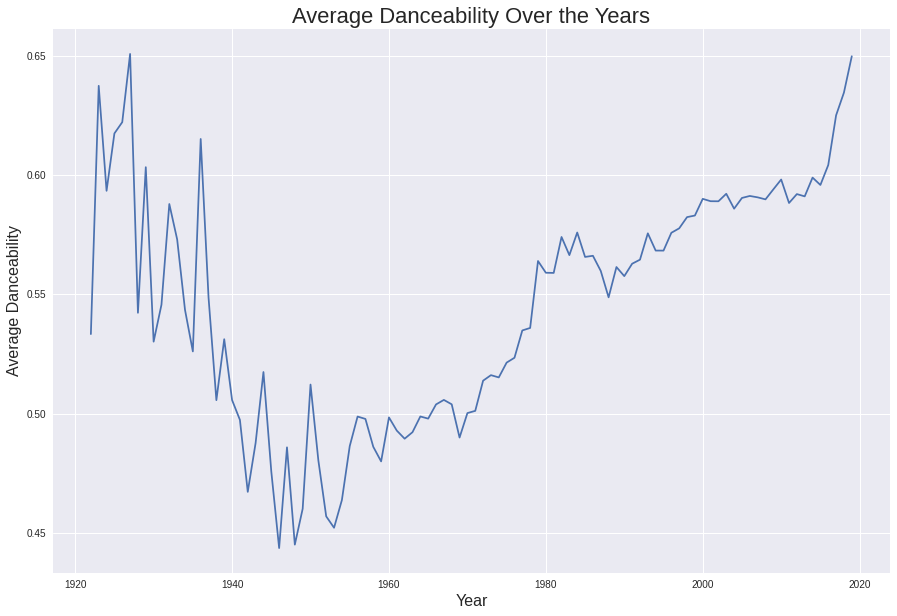

In [17]:
fig = plt.figure(figsize=(15, 10))
plt.plot(mean_danceability['year'], mean_danceability['danceability'])
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Average Danceability', fontsize = 16)
plt.title('Average Danceability Over the Years', fontsize = 22)

In [18]:
mean_loudness = limit.groupby(['year'])['loudness'].mean()
mean_loudness = mean_loudness.to_frame()
mean_loudness.reset_index(inplace = True)
mean_loudness.index = mean_loudness.index + 1
mean_loudness.head()

,year,loudness
1,1922,-13.953241
2,1923,-16.351921
3,1924,-13.290367
4,1925,-14.977595
5,1926,-15.929906


Text(0.5, 1.0, 'Average Loudness From 1922 to 2020')

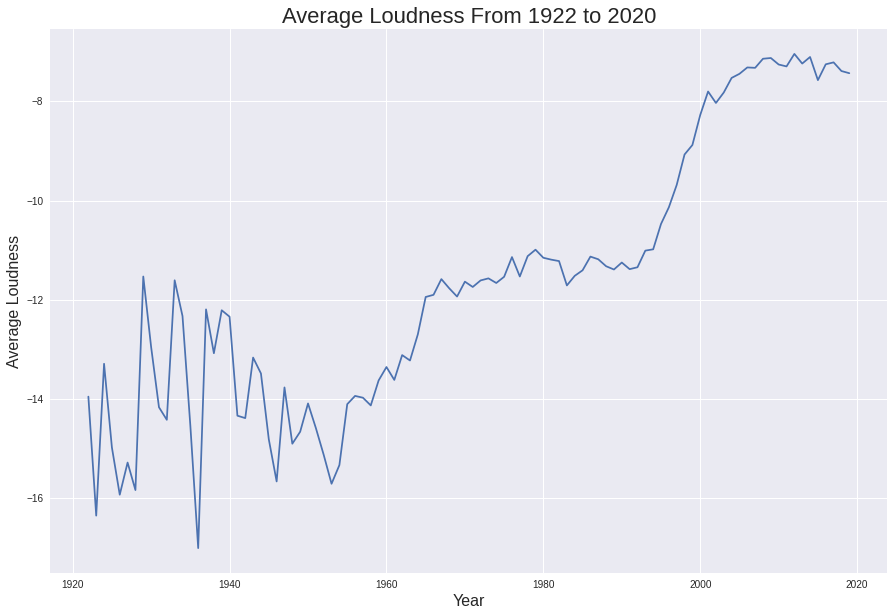

In [19]:
fig = plt.figure(figsize=(15, 10))
plt.plot(mean_loudness['year'], mean_loudness['loudness'])
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Average Loudness', fontsize = 16)
plt.title('Average Loudness From 1922 to 2020', fontsize = 22)

In [20]:
mean_duration = tracks.groupby(['year'])['duration_min'].mean()
mean_duration = mean_duration.to_frame()
mean_duration.reset_index(inplace = True)
mean_duration.index = mean_duration.index + 1
mean_duration.head()

,year,duration_min
1,1922,2.777367
2,1923,2.616265
3,1924,3.151855
4,1925,3.156183
5,1926,2.765776


Text(0.5, 1.0, 'Average Duration of a Track Over the Years')

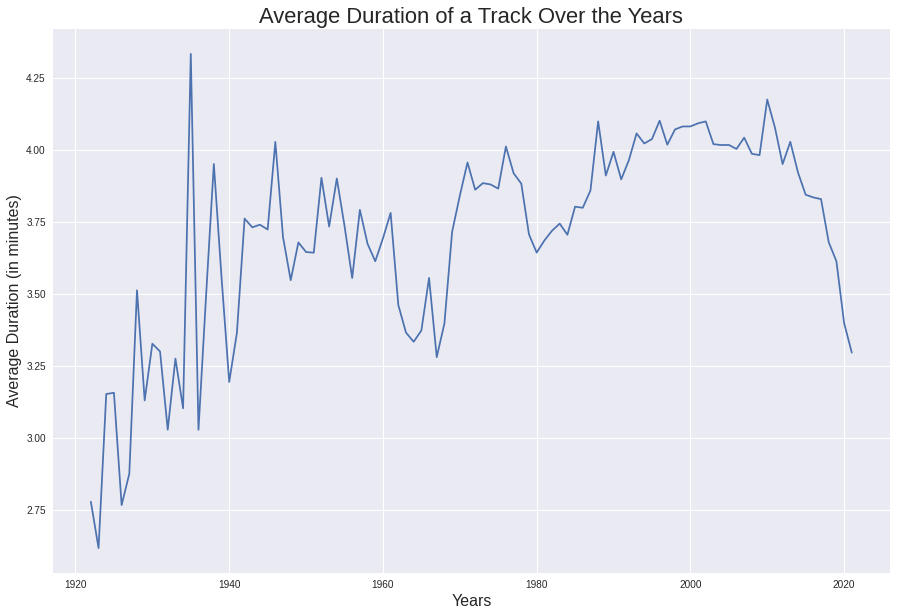

In [21]:
fig = plt.figure(figsize=(15, 10))
plt.plot(mean_duration['year'], mean_duration['duration_min'])
plt.xlabel('Years', fontsize = 16)
plt.ylabel('Average Duration (in minutes)', fontsize = 16)
plt.title('Average Duration of a Track Over the Years', fontsize = 22)

-----------

# <u>Hypothesis Testing</u>




We now want to put our theory to the test. However, let's have a clear picture of what hypothesis testing entails. Hypothesis testing is a statistical approach for assessing if a model you've constructed is a good match or not. Hypothesis testing consists of two types of hypotheses: a null hypothesis and an alternative hypothesis. The objective is that you want to put up your hypothesis in such a way that the null hypothesis is rejected. So now, what is the interpretation of rejecting a hypothesis? This is when the amount of relevance comes into play. In addition to the hypotheses, you must provide a significance level while planning your experiment. You reject the null hypothesis if the p value of your random variable is less than your significance level, also known as the rejection level.

We want to collect data from every song Beyonce has ever released for our study. The API can be used to produce a dataset in a few different ways. We could get a list of the artist's albums and then play each album track on a loop.
Alternatively, we could cycle through a playlist we find on Spotify that has every track Beyonce has to offer, which would possibly more efficient.

Based on Beyoncé's discography from 2002 to present, our null hypothesis is that there's no relationship between her songs' popularity on Spotify and its audio features. Our alternative hypothesis says that there is a relationship.

In [22]:
fastfwd = tracks[tracks.year > 2001]

In [23]:
# Narrows the dataset to songs by Beyoncé or feature Beyoncé
bey_tracks = pd.DataFrame()
bey_tracks = fastfwd[fastfwd['artists'].apply(lambda x: 'Beyoncé' in x)]
bey_tracks.head()

,id,name,popularity,duration_min,explicit,artists,id_artists,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
397035,5ljCWsDlSyJ41kwqym2ORw,03' Bonnie & Clyde,66,3.426000,1,"[JAY-Z, Beyoncé]","['3nFkdlSjzX9mRTtwJOzDYB', '6vWDO969PvNqNYHIOW...",2002,0.759,0.678,9,-5.148,0,0.3140,0.23000,0.000000,0.1500,0.327,89.640,4
397958,29LHe8kG3PraghUZOZYsw4,Baby Boy (feat. Beyoncé ),60,4.111783,0,"[Sean Paul, Beyoncé]","['3Isy6kedDrgPYoTS1dazA9', '6vWDO969PvNqNYHIOW...",2002,0.658,0.621,1,-5.725,1,0.2310,0.06670,0.000002,0.1420,0.817,91.267,4
397990,1uVfUdVv0h9MWia3tdZo5G,Baby Boy (feat. Beyoncé ),60,4.111783,0,"[Sean Paul, Beyoncé]","['3Isy6kedDrgPYoTS1dazA9', '6vWDO969PvNqNYHIOW...",2002,0.658,0.621,1,-5.725,1,0.2310,0.06670,0.000002,0.1420,0.817,91.267,4
398085,3pxJuMLjNPtiC0fX8EHFlF,"Me, Myself and I",59,5.019550,0,[Beyoncé],['6vWDO969PvNqNYHIOW5v0m'],2003,0.747,0.470,1,-9.080,1,0.0819,0.22800,0.000099,0.1590,0.555,83.615,4
398266,0WqIKmW4BTrj3eJFmnCKMv,Crazy In Love (feat. Jay-Z),25,3.932217,0,"[Beyoncé, JAY-Z]","['6vWDO969PvNqNYHIOW5v0m', '3nFkdlSjzX9mRTtwJO...",2003,0.664,0.758,2,-6.583,0,0.2100,0.00238,0.000000,0.0598,0.701,99.259,4


We are going to perform the Least Squares linear regression on our dataset in order to determine our null hypothesis.

In [24]:
reg = ols(formula = 'popularity ~ duration_min + danceability + loudness', data = bey_tracks).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.474
Date:                Wed, 21 Jul 2021   Prob (F-statistic):              0.223
Time:                        20:57:01   Log-Likelihood:                -684.89
No. Observations:                 169   AIC:                             1378.
Df Residuals:                     165   BIC:                             1390.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       53.8220      8.944      6.018      0.000      36.162      71.482
duration_min     2.1643      1.537      1.408      0.161      -0.870       5.199
danceability   -11.0928      7.762     -1.429      0.155     -26.418       4.233
loudness         0.1484      0.591      0.251      0.802      -1.018       1.315
==============================================================================
Omnibus:                       41.969   Durbin-Watson:                   0.697
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.568
Skew:                          -1.144   Prob(JB):                     7.14e-19
Kurtosis:                       5.575   Cond. No.                         81.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the p-values within the OLS summary, which are all well above the 5% percent rejection, thus there's not evidence to suggest that there is a relationship between the popularity and the song's audio features.

# <u>Conclusion</u>

We were trying to look for a relationship between Spotify features and if it played a role in determining a songs popularity. We have specifically looked at beyonces features to see if we can identify a pattern but unfortunate we were unable to identify it. It doesn’t mean that there aren’t other additional patterns but it just means that this particular pattern doesn’t exist.
The steps that can be taken in the future is incorporating machine learning to see how the system performs or acts when it comes to identifying the patterns and making decisions with little human interaction.
All of the code on this webpage can be obtained from the GitHub. 



# <u> Resources</u>
Spotify:
https://developer.spotify.com/documentation/web-api/reference/#object-audiofeaturesobject

Visualization:
https://www.fusioncharts.com/blog/best-python-data-visualization-libraries/
https://towardsdatascience.com/visualizing-spotify-songs-with-python-an-exploratory-data-analysis-fc3fae3c2c09

Machine Learning to pursue in future:
https://medium.com/analytics-vidhya/predicting-song-popularity-71bc3b067237
http://www.math.utah.edu/~gustafso/s2018/2270/projects-2018/submittedprojects/sorenNelson/Spotify's%20Collaborative%20Filtering.pdf